In [66]:
from master_thesis.src import models, utils, data
import scipy.stats as st
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [67]:
def compare(true, pred, scatter = True):
    if scatter == True:
        plt.scatter(true, pred, alpha = 0.05)
        plt.xlabel('True')
        plt.ylabel('Predictions')
        plt.axis('equal')
        plt.axis('square')
        plt.xlim(0,600)
        plt.ylim(0,600)
        plt.show()
        
    pearson = st.pearsonr(true, pred)[0]  
    spearman = st.spearmanr(true, pred)[0]    
    
    if not np.isnan(pearson): # if array is constant (mean baseline)
        pearson = pearson.round(3)
    if not np.isnan(spearman):
        spearman = spearman.round(3)  
    
    rt = {"Pearson": pearson,
          "Spearman": spearman,
          "MAE": mean_absolute_error(true, pred).round(2),
          "MSE": mean_squared_error(true, pred).round(1),
          "RAE": utils.relative_absolute_error(np.array(pred), np.array(true)).round(2)
         }
    
    return rt

In [68]:
PATH_predictions = utils.OUTPUT / "predictions"

In [69]:
print(PATH_predictions)

/home/ruecker/workspace/master_thesis/master_thesis/outputs/predictions


In [98]:
models_dict = {
'BertFFN': 'BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-03-03_00:13:33.tsv',
'BertAveraging': 'BertAveraging_FIXLEN512_MINLENNone_START0_EP30_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-03-31_16:45:24.tsv',
'BertSequence': 'BertSequence_FIXLEN512_MINLENNone_START0_EP30_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-05-04_19:04:19.tsv',
    
'BertTextlength': 'BertTextlength_FIXLEN512_MINLENNone_START0_EP40_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-04-27_11:37:43.tsv',
    
'BertHiMean400': 'BertHierarchical_SECTIONSIZE400_MAX_SECT6_EP100_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_2021-04-02_12:07:01.tsv',
#'BertHiMean400pre': 'BertHierarchical_SECTIONSIZE400_MAX_SECT6_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_pretrained_2021-05-10_11:23:00.tsv',
'BertHiMean400pre': 'BertHierarchical_SECTIONSIZE400_MAX_SECT6_EP20_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_pretrained_2021-05-13_14:51:56.tsv',
'BertHiMean512': 'BertHierarchical_SECTIONSIZE512_MAX_SECT5_EP100_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_2021-04-08_15:29:27.tsv',
#'BertHiMean512pre': 'BertHierarchical_SECTIONSIZE512_MAX_SECT5_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_pretrained_2021-04-19_12:21:17.tsv',
'BertHiMean512pre': 'BertHierarchical_SECTIONSIZE512_MAX_SECT5_EP20_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_pretrained_2021-05-14_11:34:32.tsv',    
    
'BertHiGRU400': 'BertHierarchicalRNN_SECTIONSIZE400_MAX_SECT6_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_GRU_2021-04-04_11:35:50.tsv',
'BertHiGRU400pre': 'BertHierarchicalRNN_SECTIONSIZE400_MAX_SECT6_EP20_BS32_LR1e-05_avgTimeOnPage_NOZ_GRU_pretrained_2021-05-11_10:49:15.tsv',
'BertHiGRU512': 'BertHierarchicalRNN_SECTIONSIZE512_MAX_SECT5_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_GRU_2021-04-14_11:14:43.tsv',
'BertHiGRU512pre': 'BertHierarchicalRNN_SECTIONSIZE512_MAX_SECT5_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_GRU_pretrained_2021-04-20_23:07:20.tsv',

'CNN800': 'CNN_FIXLEN800_MINLENNone_START0_EP50_BS32_LR0.0002_avgTimeOnPage_NOZ_2021-03-10_10:15:33.tsv',
    
'BertEmbsFFN': 'BertEmbs_FIXLEN512_MINLENNone_START0_EP60_BS32_LR0.001_avgTimeOnPage_NOZ_2021-05-04_14:13:11.tsv',
'DANFFN': 'DANFastText_EP60_BS32_LR0.001_avgTimeOnPage_NOZ_2021-05-04_16:53:59.tsv',
    
'DANRidge': 'EmbsRidge.tsv',
'BertEmbsRidge': 'BertFeaturesRidge.tsv',
    
'BaselineTextlength': 'textlength_baseline.tsv',
'BaselineMean': 'mean_baseline.tsv',
    
#'BOWRidge': 'BOW_CountVectorizer_ridge_abs_10000_FalseTrueTrue.tsv',
'BOWRidgeS': 'BOW_CountVectorizer_ridge_abs_1000_TrueTrueTrue.tsv',
#'BOWXGBoost': 'BOW_CountVectorizer_xgboost_abs_50000_FalseTrueTrue.tsv',

'BOWXGBoost': 'BOW_CountVectorizer_xgboost_abs_10000_TrueTrueTrue.tsv', # das ist für SHAP schöner...
#'BOWXGBoostL': 'BOW_CountVectorizer_xgboost_abs_100000_FalseTrueTrue.tsv' # das ist etwas besser

}



In [99]:
columns = pd.MultiIndex.from_product([['dev', 'test'], ["Pearson", "Spearman", "MSE", "MAE", "RAE"]],
                                     names=['set', 'metric'])

In [100]:
results = pd.DataFrame(data=0., index = models_dict.keys(), columns = columns)

In [101]:
results

set                    dev                            test                     \
metric             Pearson Spearman  MSE  MAE  RAE Pearson Spearman  MSE  MAE   
BertFFN                0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertAveraging          0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertSequence           0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertTextlength         0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiMean400          0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiMean400pre       0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiMean512          0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiMean512pre       0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiGRU400           0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiGRU400pre        0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiGRU512           0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiGRU512pre        0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
CNN800                 0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertEmbsFFN            0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
DANFFN                 0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
DANRidge               0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertEmbsRidge          0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BaselineTextlength     0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BaselineMean           0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BOWRidgeS              0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BOWXGBoost             0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   

set                      
metric              RAE  
BertFFN             0.0  
BertAveraging       0.0  
BertSequence        0.0  
BertTextlength      0.0  
BertHiMean400       0.0  
BertHiMean400pre    0.0  
BertHiMean512       0.0  
BertHiMean512pre    0.0  
BertHiGRU400        0.0  
BertHiGRU400pre     0.0  
BertHiGRU512        0.0  
BertHiGRU512pre     0.0  
CNN800              0.0  
BertEmbsFFN         0.0  
DANFFN              0.0  
DANRidge            0.0  
BertEmbsRidge       0.0  
BaselineTextlength  0.0  
BaselineMean        0.0  
BOWRidgeS           0.0  
BOWXGBoost          0.0

In [102]:
for name, identifier in models_dict.items():
    print(name)
    pred_dev = pd.read_csv(PATH_predictions / "dev" / identifier, index_col = 0, sep = '\t')
    pred_test = pd.read_csv(PATH_predictions / "test" / identifier, index_col = 0, sep = '\t')
    
    print(pred_dev.loc["NOZ_2014740"])
    print(pred_test.loc["NOZ_1847617"])
    
    rt_dev = compare(pred_dev.true, pred_dev.pred, scatter = False)
    rt_test = compare(pred_test.true, pred_test.pred, scatter = False)
    
    print(rt_dev)
    print(rt_test)
    
    for key, value in rt_dev.items():
        results.loc[name, "dev"][key] = value
        
    for key, value in rt_test.items():
        results.loc[name, "test"][key] = value

    print("--------")

BertFFN
true    202.0566
pred    158.2319
Name: NOZ_2014740, dtype: float64
true    208.8209
pred    244.3113
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.695, 'Spearman': 0.558, 'MAE': 54.66, 'MSE': 10397.0, 'RAE': 76.69}
{'Pearson': 0.624, 'Spearman': 0.599, 'MAE': 49.86, 'MSE': 7959.2, 'RAE': 76.59}
--------
BertAveraging
true    202.0566
pred    147.2523
Name: NOZ_2014740, dtype: float64
true    208.8209
pred    205.1047
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.678, 'Spearman': 0.569, 'MAE': 54.39, 'MSE': 10737.6, 'RAE': 76.32}
{'Pearson': 0.604, 'Spearman': 0.607, 'MAE': 50.34, 'MSE': 8529.3, 'RAE': 77.32}
--------
BertSequence
true    202.0566
pred    174.2836
Name: NOZ_2014740, dtype: float64
true    208.8209
pred    174.2836
Name: NOZ_1847617, dtype: float64
{'Pearson': nan, 'Spearman': nan, 'MAE': 68.26, 'MSE': 19757.5, 'RAE': 95.77}
{'Pearson': nan, 'Spearman': nan, 'MAE': 63.71, 'MSE': 12846.9, 'RAE': 97.87}
--------
BertTextlength
true    202.0566
pred    149.7561

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


{'Pearson': 0.616, 'Spearman': 0.53, 'MAE': 58.66, 'MSE': 12172.7, 'RAE': 82.31}
{'Pearson': 0.572, 'Spearman': 0.556, 'MAE': 53.57, 'MSE': 8692.3, 'RAE': 82.28}
--------
DANFFN
true    202.0566
pred    145.2645
Name: NOZ_2014740, dtype: float64
true    208.8209
pred    218.3995
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.532, 'Spearman': 0.434, 'MAE': 64.12, 'MSE': 14004.5, 'RAE': 89.96}
{'Pearson': 0.531, 'Spearman': 0.438, 'MAE': 58.25, 'MSE': 9217.0, 'RAE': 89.48}
--------
DANRidge
true    202.056604
pred    187.304183
Name: NOZ_2014740, dtype: float64
true    208.820896
pred    205.945674
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.365, 'Spearman': 0.326, 'MAE': 68.41, 'MSE': 16953.6, 'RAE': 95.99}
{'Pearson': 0.374, 'Spearman': 0.325, 'MAE': 62.57, 'MSE': 11001.9, 'RAE': 96.11}
--------
BertEmbsRidge
true    202.056604
pred    169.780085
Name: NOZ_2014740, dtype: float64
true    208.820896
pred    253.925334
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.514, 'Spearman':

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [103]:
results.loc[:, "test"]["Pearson"]

BertFFN               0.624
BertAveraging         0.604
BertSequence            NaN
BertTextlength        0.657
BertHiMean400         0.627
BertHiMean400pre      0.649
BertHiMean512         0.643
BertHiMean512pre      0.655
BertHiGRU400          0.655
BertHiGRU400pre       0.659
BertHiGRU512          0.645
BertHiGRU512pre       0.657
CNN800                0.476
BertEmbsFFN           0.572
DANFFN                0.531
DANRidge              0.374
BertEmbsRidge         0.512
BaselineTextlength    0.401
BaselineMean            NaN
BOWRidgeS             0.427
BOWXGBoost            0.500
Name: Pearson, dtype: float64

In [104]:
# hier nach Pearson (oder anderem) auf test-Set sortiert

results_sorted = results.sort_values([('test', 'Pearson')], ascending=True, na_position= 'first')
#results_sorted = results.sort_values([('test', 'MAE')], ascending=False, na_position= 'first')
#results_sorted = results.sort_values([('test', 'RAE')], ascending=False, na_position= 'first')


results_sorted

set                    dev                                    test           \
metric             Pearson Spearman      MSE    MAE    RAE Pearson Spearman   
BertSequence           NaN      NaN  19757.5  68.26  95.77     NaN      NaN   
BaselineMean           NaN      NaN  19533.4  70.21  98.52     NaN      NaN   
DANRidge             0.365    0.326  16953.6  68.41  95.99   0.374    0.325   
BaselineTextlength   0.389    0.534  17832.2  63.93  89.70   0.401    0.546   
BOWRidgeS            0.475    0.429  15197.4  66.76  93.67   0.427    0.434   
CNN800               0.461    0.400  16496.8  68.61  96.26   0.476    0.425   
BOWXGBoost           0.500    0.557  14657.4  60.81  85.32   0.500    0.576   
BertEmbsRidge        0.514    0.467  14379.2  66.51  93.32   0.512    0.476   
DANFFN               0.532    0.434  14004.5  64.12  89.96   0.531    0.438   
BertEmbsFFN          0.616    0.530  12172.7  58.66  82.31   0.572    0.556   
BertAveraging        0.678    0.569  10737.6  54.39  76.32   0.604    0.607   
BertFFN              0.695    0.558  10397.0  54.66  76.69   0.624    0.599   
BertHiMean400        0.708    0.583  10884.1  60.84  85.37   0.627    0.622   
BertHiMean512        0.698    0.613  10176.4  54.55  76.54   0.643    0.618   
BertHiGRU512         0.696    0.599  10372.3  53.52  75.09   0.645    0.633   
BertHiMean400pre     0.686    0.588  10419.2  53.57  75.17   0.649    0.623   
BertHiGRU400         0.713    0.592   9647.4  53.90  75.63   0.655    0.627   
BertHiMean512pre     0.719    0.601   9673.9  54.24  76.10   0.655    0.621   
BertHiGRU512pre      0.705    0.593   9857.4  55.67  78.11   0.657    0.613   
BertTextlength       0.703    0.600   9960.9  54.14  75.96   0.657    0.634   
BertHiGRU400pre      0.672    0.552  10901.1  57.10  80.11   0.659    0.590   

set                                         
metric                  MSE    MAE     RAE  
BertSequence        12846.9  63.71   97.87  
BaselineMean        12795.0  65.94  101.29  
DANRidge            11001.9  62.57   96.11  
BaselineTextlength  11478.5  59.50   91.39  
BOWRidgeS           10955.1  62.52   96.04  
CNN800              10833.4  62.84   96.54  
BOWXGBoost           9754.1  54.65   83.95  
BertEmbsRidge        9592.6  60.73   93.29  
DANFFN               9217.0  58.25   89.48  
BertEmbsFFN          8692.3  53.57   82.28  
BertAveraging        8529.3  50.34   77.32  
BertFFN              7959.2  49.86   76.59  
BertHiMean400        9109.6  57.11   87.72  
BertHiMean512        7993.5  50.42   77.46  
BertHiGRU512         7796.0  49.07   75.38  
BertHiMean400pre     7409.4  48.68   74.77  
BertHiGRU400         7593.3  49.33   75.77  
BertHiMean512pre     7486.2  49.73   76.40  
BertHiGRU512pre      7485.2  51.28   78.78  
BertTextlength       7672.8  49.98   76.77  
BertHiGRU400pre      7611.3  51.35   78.88

In [105]:
latex = results_sorted.drop('Spearman', axis=1, level=1)

In [106]:
latex

set                    dev                           test                  \
metric             Pearson      MSE    MAE    RAE Pearson      MSE    MAE   
BertSequence           NaN  19757.5  68.26  95.77     NaN  12846.9  63.71   
BaselineMean           NaN  19533.4  70.21  98.52     NaN  12795.0  65.94   
DANRidge             0.365  16953.6  68.41  95.99   0.374  11001.9  62.57   
BaselineTextlength   0.389  17832.2  63.93  89.70   0.401  11478.5  59.50   
BOWRidgeS            0.475  15197.4  66.76  93.67   0.427  10955.1  62.52   
CNN800               0.461  16496.8  68.61  96.26   0.476  10833.4  62.84   
BOWXGBoost           0.500  14657.4  60.81  85.32   0.500   9754.1  54.65   
BertEmbsRidge        0.514  14379.2  66.51  93.32   0.512   9592.6  60.73   
DANFFN               0.532  14004.5  64.12  89.96   0.531   9217.0  58.25   
BertEmbsFFN          0.616  12172.7  58.66  82.31   0.572   8692.3  53.57   
BertAveraging        0.678  10737.6  54.39  76.32   0.604   8529.3  50.34   
BertFFN              0.695  10397.0  54.66  76.69   0.624   7959.2  49.86   
BertHiMean400        0.708  10884.1  60.84  85.37   0.627   9109.6  57.11   
BertHiMean512        0.698  10176.4  54.55  76.54   0.643   7993.5  50.42   
BertHiGRU512         0.696  10372.3  53.52  75.09   0.645   7796.0  49.07   
BertHiMean400pre     0.686  10419.2  53.57  75.17   0.649   7409.4  48.68   
BertHiGRU400         0.713   9647.4  53.90  75.63   0.655   7593.3  49.33   
BertHiMean512pre     0.719   9673.9  54.24  76.10   0.655   7486.2  49.73   
BertHiGRU512pre      0.705   9857.4  55.67  78.11   0.657   7485.2  51.28   
BertTextlength       0.703   9960.9  54.14  75.96   0.657   7672.8  49.98   
BertHiGRU400pre      0.672  10901.1  57.10  80.11   0.659   7611.3  51.35   

set                         
metric                 RAE  
BertSequence         97.87  
BaselineMean        101.29  
DANRidge             96.11  
BaselineTextlength   91.39  
BOWRidgeS            96.04  
CNN800               96.54  
BOWXGBoost           83.95  
BertEmbsRidge        93.29  
DANFFN               89.48  
BertEmbsFFN          82.28  
BertAveraging        77.32  
BertFFN              76.59  
BertHiMean400        87.72  
BertHiMean512        77.46  
BertHiGRU512         75.38  
BertHiMean400pre     74.77  
BertHiGRU400         75.77  
BertHiMean512pre     76.40  
BertHiGRU512pre      78.78  
BertTextlength       76.77  
BertHiGRU400pre      78.88

In [107]:
print(latex.to_latex(
    index=True,
    na_rep = "-"
    #float_format="%.2f",
    )) 

\begin{tabular}{lrrrrrrrr}
\toprule
set & \multicolumn{4}{l}{dev} & \multicolumn{4}{l}{test} \\
metric & Pearson &      MSE &    MAE &    RAE & Pearson &      MSE &    MAE &     RAE \\
\midrule
BertSequence       &       - &  19757.5 &  68.26 &  95.77 &       - &  12846.9 &  63.71 &   97.87 \\
BaselineMean       &       - &  19533.4 &  70.21 &  98.52 &       - &  12795.0 &  65.94 &  101.29 \\
DANRidge           &   0.365 &  16953.6 &  68.41 &  95.99 &   0.374 &  11001.9 &  62.57 &   96.11 \\
BaselineTextlength &   0.389 &  17832.2 &  63.93 &  89.70 &   0.401 &  11478.5 &  59.50 &   91.39 \\
BOWRidgeS          &   0.475 &  15197.4 &  66.76 &  93.67 &   0.427 &  10955.1 &  62.52 &   96.04 \\
CNN800             &   0.461 &  16496.8 &  68.61 &  96.26 &   0.476 &  10833.4 &  62.84 &   96.54 \\
BOWXGBoost         &   0.500 &  14657.4 &  60.81 &  85.32 &   0.500 &   9754.1 &  54.65 &   83.95 \\
BertEmbsRidge      &   0.514 &  14379.2 &  66.51 &  93.32 &   0.512 &   9592.6 &  60.73 &   93.29 \

BertFFN


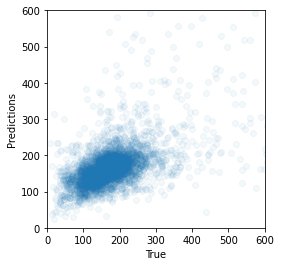

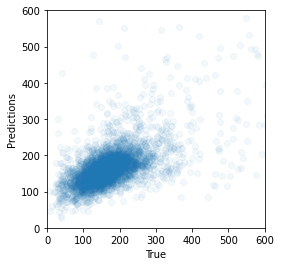

--------
BertAveraging


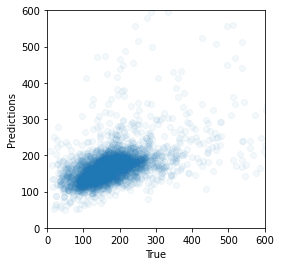

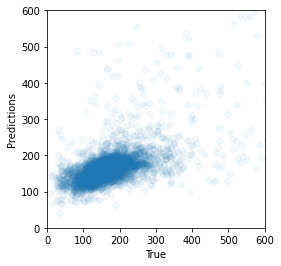

--------
BertSequence


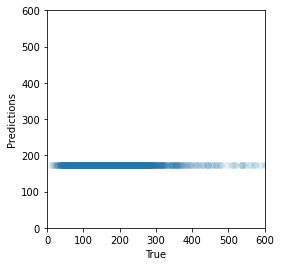

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


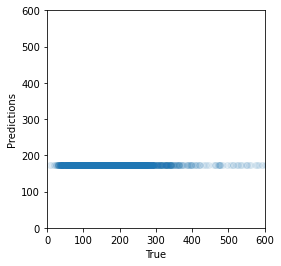

--------
BertTextlength


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


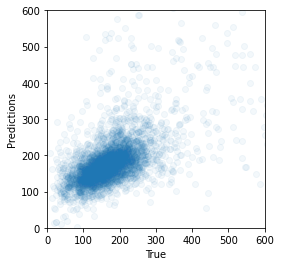

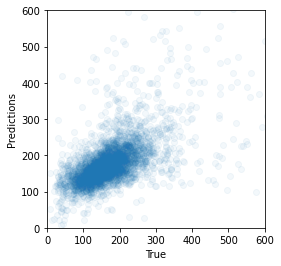

--------
BertHiMean400


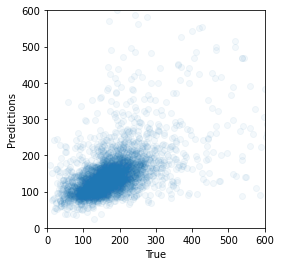

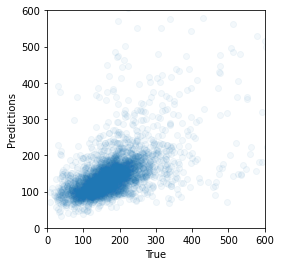

--------
BertHiMean400pre


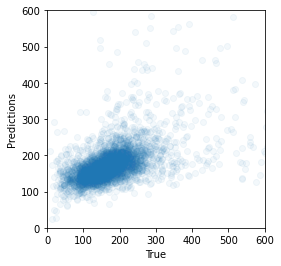

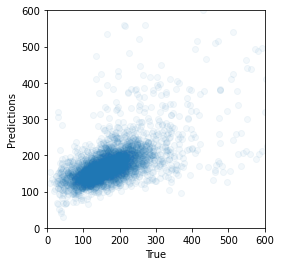

--------
BertHiMean512


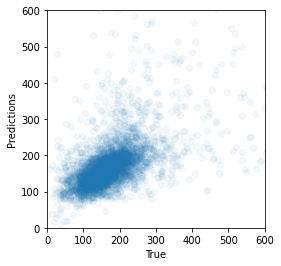

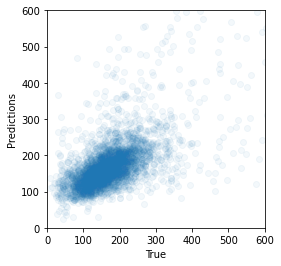

--------
BertHiMean512pre


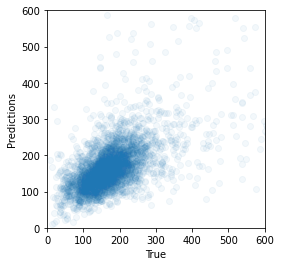

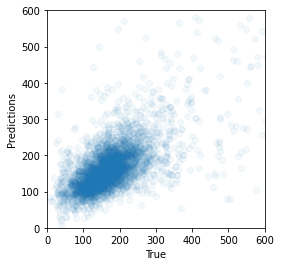

--------
BertHiGRU400


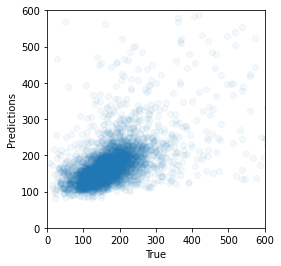

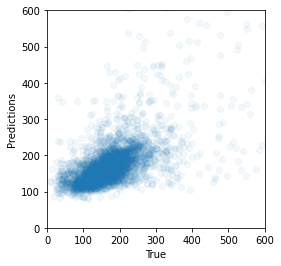

--------
BertHiGRU400pre


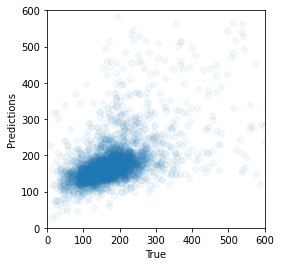

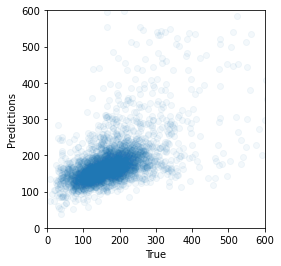

--------
BertHiGRU512


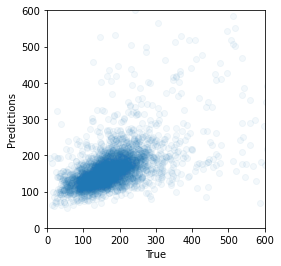

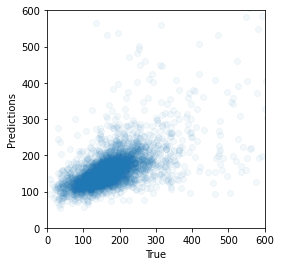

--------
BertHiGRU512pre


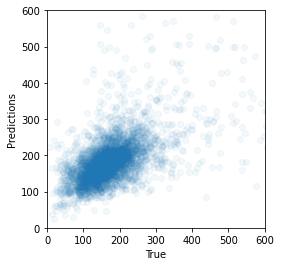

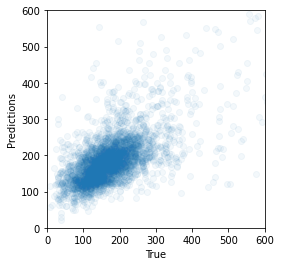

--------
CNN800


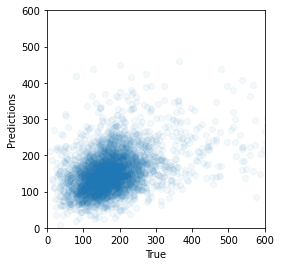

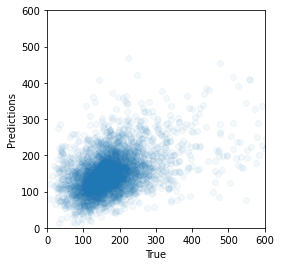

--------
BertEmbsFFN


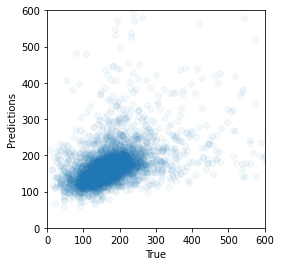

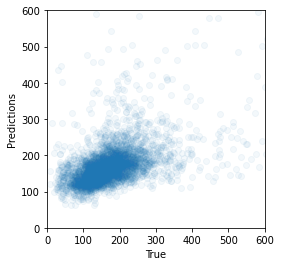

--------
DANFFN


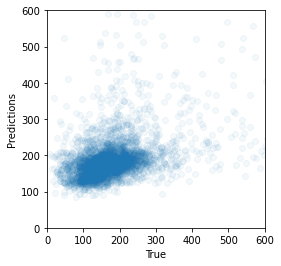

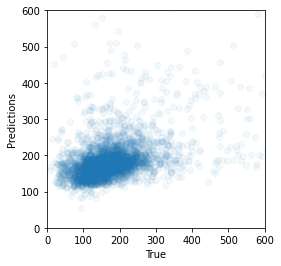

--------
DANRidge


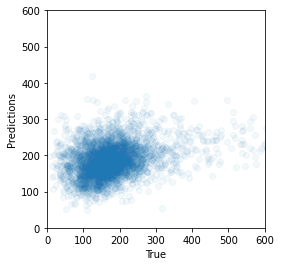

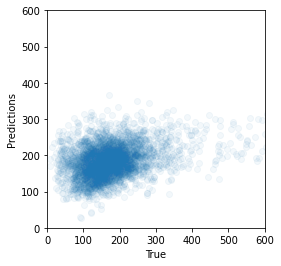

--------
BertEmbsRidge


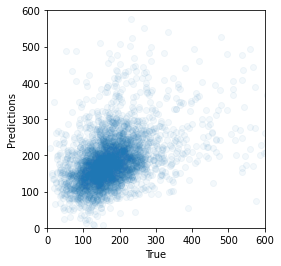

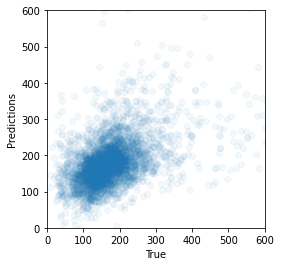

--------
BaselineTextlength


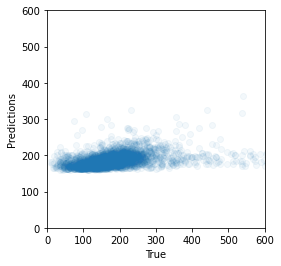

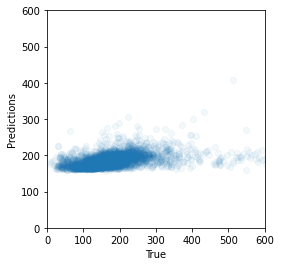

--------
BaselineMean


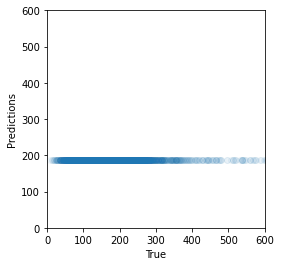

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


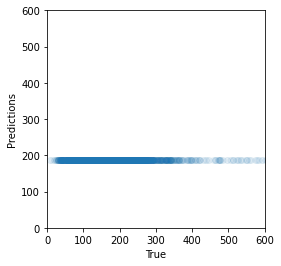

--------
BOWRidgeS


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


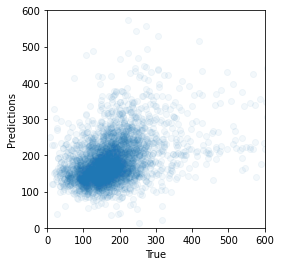

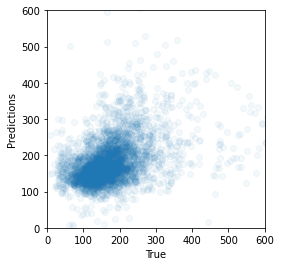

--------
BOWXGBoost


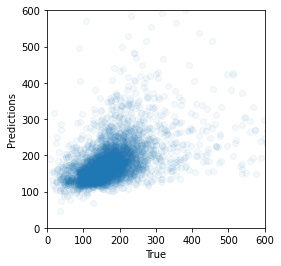

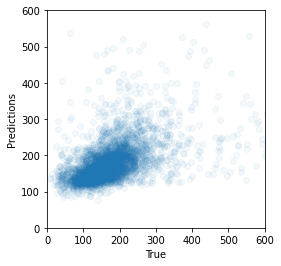

--------


In [108]:
for name, identifier in models_dict.items():
    print(name)
    pred_dev = pd.read_csv(PATH_predictions / "dev" / identifier, index_col = 0, sep = '\t')
    pred_test = pd.read_csv(PATH_predictions / "test" / identifier, index_col = 0, sep = '\t')
    
    rt_dev = compare(pred_dev.true, pred_dev.pred, scatter = True)
    rt_test = compare(pred_test.true, pred_test.pred, scatter = True)
    
    print("--------")